# Instalação

## Passos necessários
* Baixar / atualizar o Selenium com ```pip install --upgrade selenium``` no prompt do anaconda (mantenha-o atualizado)
* Usar o chrome, pois tem total compatibilidade com o selenium
* Verifcar a versão do seu Google Chrome
* baixar o google driver [https://chromedriver.chromium.org/downloads](https://chromedriver.chromium.org/downloads)
* Ao baixar, extraia o arquivo e cole onde está instalado o python. No meu caso é: __C:\Users\Diego\anaconda3__

## Agora basta executar o comando pra abrir o navegador

In [36]:
from selenium import webdriver

driver = webdriver.Chrome()


## Chromedriver em outro local

Você pode deixar o __chromewebdriver__ em outro local do computador, para isso precisamos de outra biblioteca e usar o método ```Service```.\
Veja como fica:
```
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

servico = Service(r'caminho\webdriver.exe')

driver = webdriver.Chrome(service=servico)
```
__Observação:__ No linux ou MAC não coloque __.exe__


## Gerenciador de webdriver

O código a seguir permite instalar o webdriver correspondente ao seu navegador, ele faz isso toda vez que o código é iniciado. Mas pra isso você deve instalar o __webdriver-manager__:
```
pip install webdriver-manager
```
## Depois é só rodar o código

In [37]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

servico = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=servico)


# Abrindo uma página específica

Para abrir um site basta usar o comando __.get(link)__.\

No caso do exemplo acima usamos:
```
link = 'https:/www.site.com/'
driver.get(link)
```
Se quiser mais de uma página, crie vários navegadores e pra cada um use o __.get()__

## Também é possível abrir um arquivo em html
Pra isso basta usar o caminho do arquivo
```
link = r'C:\Users\Fulano\Documents\Arquivo.html'
driver.get(link)
```

In [48]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)


In [49]:
navegador.get(r'C:\Users\Diego\Downloads\Pagina Hashtag.html')


# Selecionando objetos com o Selenium

A seleção de elementos é uma das partes __mais importante e difícil__ no uso de automação com selenium.\
Segue alguns métodos de seleção:
* id
* xpath
* class_name
* text
* tipo de informação
* link_text
* partial_link_text
* name
* tag_name
* css_selector

O mais recomendado é pelo __id__

Mas deve ser importado o método ```By```

```from selenium.webdriver.common.by import By```

### Métodos de seleção de elementos
```navegador.find_element``` __-> traz uma lista com 1 item__
<br>
```navegador.find_elements``` __-> traz uma lisa com vários elementos__

## Abaixo está a manipulaçao do site da Hashtag

In [10]:
import os
from selenium.webdriver.common.by import By

caminho = os.getcwd()

arquivo = caminho + r'\Pagina Hashtag.html'

# Página local da Hashtag
navegador.get(arquivo)

# Clicando em contato
navegador.find_element(By.XPATH, '//*[@id="menu-item-221"]/a').click()

# Definindo elemento de entrada de nome e escrevendo algo
navegador.find_element(By.ID, 'firstname').send_keys("Diego Ribeiro")

# Definindo elemento de entrada de nome e escrevendo algo
navegador.find_element(By.ID, 'email').send_keys("meuemail@serv.com.br")

# Clicando num botão
navegador.find_element(By.CLASS_NAME, 'botao-formulario-newsletter').click()


In [11]:
# Trabalhando na página da Univesp
navegador.get('https://univesp.br/')

# Insere texto na barra de pesquisa
navegador.find_element(By.ID, 's').send_keys("Cursos de engenharia")


# Seleção pelo CLASS NAME e pelo XPATH

Sempre que o elemento que deseja selecionar para clicar por exemplo não tiver um __id__, pode tentar usar o __class_name__, para isso funcionar nem sempre será o selecionado, mas deve ir tentando até encontrar,\
Na caso de procurar elementos para colocar no código, deve ser procurado com __Crtl+Shit+i__, esse comando entra na parte de inspação do __html__.\
__MASSSS__ pode não funcionar com __class_name__, então deve usar o __XPATH__.

## Usando o XPATH

Passos a seguir para obter o __XPATH:__
* Abrir a página em questão
* Abrir o inspecionar
* Habilitar seleção com a "setinha"
* Clicar no elemento desejado
* Na linha marcada no html clicar botão direito
* Clica em __Copy - Copy Xpath__


## Lógica de encontrar nome de elementos

Procurar pelos passos
* ID
* CLASS_NAME
* XPATH


In [12]:
# Clica na barra de pesquisa
navegador.find_element(By.CLASS_NAME, 'btn').click()


In [13]:
# Usando outro site
navegador.get('https://www.tecmundo.com.br/cultura-geek/217401-10-melhores-coringas-historia.htm')

# Clicando em Tutoriais
navegador.find_element(By.XPATH, '//*[@id="js-header"]/nav/div/ul/li[4]/a').click()

# Clicando em 'Como Usar o Apple Pay com mais Segurança?'
navegador.find_element(By.CLASS_NAME, 'tec--tag-main__item__thumb__image').click()


# Métodos alternativos para selecionar elementos numa página Web

São os métodos os seguintes:
* Selecionar usando TAG
* Selecionar usando NAME
* Selecionar usando LINK_TEXT ou PARTIAL_LINK_TEXT

## Vamos ver na prática

In [43]:
# SELECIONANDO TÍTULO DA PÁGINA USANDO A TAG

titulo = navegador.find_element(By.TAG_NAME, 'h2').text

print(titulo)


TODOS OS CURSOS DA HASHTAG TREINAMENTOS


In [55]:
# RASPAGEM DE DADOS USANDO PARTIAL_LINK_TEXT

# Clicando em contato
navegador.find_element(By.XPATH, '//*[@id="menu-item-221"]/a').click()

# Pegando número do zap
numero_zap = navegador.find_element(By.PARTIAL_LINK_TEXT, 'WhatsApp').text

print(numero_zap)


(21) 99658-2442 (WhatsApp)


In [57]:
# PREENCHENDO O FORMULÁRIO USANDO A ENTRADA DE TEXTO PELO NAME
navegador.find_element(By.NAME, 'firstname').send_keys('Teste de nome')


# Selecionando diversos elementos

Para fazer isso devemos usar o ```find_elements```, a vantagem de selecionar vários elementos é extrair coisas que se relacionam. Um exemplo é pesquisar no yotube vídeos relacionados a um determinado assunto, extrair links deles pra determinar onde a propaganda vai ser executada.\
Um problema que ocorre de usar ```find_element``` usando __CLASS_NAME__ por exemplo é que uma página pode ter diversos elementos com a mesma classe, nesse caso o programa vai clicar ou selecionar o primeiro da lista.

In [62]:
# Importações
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Definindo navegador
servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)


[]


# Clicando num elemento pelo nome sem conhecer sua TAG

In [71]:
# Acessando site da Hashtag
navegador.get(r'C:\Users\Diego\Downloads\Pagina Hashtag.html')

# OBTENDO LISTA DE ELEMENTOS 
lista_elementos = navegador.find_elements(By.CLASS_NAME, 'nav-link')

print(len(lista_elementos))

for elemento in lista_elementos:
    texto = elemento.text.lower()
    if texto == 'blog':
        elemento.click()
        break
print('Pronto')


14
Pronto


# Usando o Selenium para pegar atributos de um elemento

Um elemento tem __texto__ e __elementos__, dizendo de forma simplificada o texto de um elemento é o que se encontra entre a abertura da __tag__ e seu fechamento. Já o atributo é o que têm na prórpria tag html.\
Os métodos aprendidos foram:
```
.text
.send_keys('Blablabla')
.click()
```
Agora temos o de pegar atributos que é:
```
.get_attribute(href)
```
__Detalhe:__ entre parenteses poderia colocar qualquer atributo desejado, podia ser classe, id, etc.

In [14]:
# Exemplo

# Importação de módulos e métodos
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

# Verifica versão e instala se necessário o WebDriver
servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)


In [15]:
import os

# Definindo caminho do arquivo
caminho = os.getcwd()

# Definição do local do arquivo
arquivo = caminho + r'\Pagina Hashtag.html'

# Obtendo página web
navegador.get(arquivo)


In [16]:
# EXEMPLO LINK ZAP

# Clicando em contato
navegador.find_element(By.XPATH, '//*[@id="menu-item-221"]/a').click()


In [18]:
# Pegando atributo do elemento
link_zap = navegador.find_element(By.XPATH, '/html/body/footer/div/div/div[1]/div[2]/div[5]/div/a').get_attribute('href')

print(link_zap)


https://api.whatsapp.com/send?phone=5521996582442&text=Ol%C3%A1%2C%20gostaria%20de%20tirar%20uma%20d%C3%BAvida%20%20sobre%20o%20curso%20online


In [20]:
# EXEMPLO IMAGENS

# Obtendo link da imegem
link_imagem = navegador.find_element(By.XPATH, '/html/body/footer/div/div/div[1]/div[1]/img').get_attribute('src')

print(link_imagem)


https://www.hashtagtreinamentos.com/wp-content/uploads/2022/05/Logo-Hashtag-Original-1.png


In [3]:
# Acessando um site e extraindo todos os links dele

# Importando módulos e métodos
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

# Inicia gerenciador do webdriver
servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)


In [55]:
# Acessa site do Butantan

url = 'https://butantan.gov.br/'

navegador.get(url)


In [56]:
# Obtendo lista de links da página

# Listando elementos com a tag <a>
lista_links = navegador.find_elements(By.TAG_NAME, 'a')

# Lista de links externos
links_externos = list()

# Criando barra de progresso
from tqdm import tqdm
pbar = tqdm(total=len(lista_links), position=0, leave=True)

# Fazendo varredura e verifica qual link é externo
for link in lista_links:
    pbar.update()
    atrib_rel = navegador.find_element(By.LINK_TEXT, link.text).get_attribute('target')
    atrib_href = navegador.find_element(By.LINK_TEXT, link.text).get_attribute('href')
    if atrib_rel == '_blank':
        links_externos.append(atrib_href)

print(links_externos)


0it [01:18, ?it/s]                                                                            | 0/1739 [00:00<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████▉| 1738/1739 [02:58<00:00, 10.04it/s]

['https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https://en.butantan.gov.br/', 'https:

100%|██████████████████████████████████████████████████████████████████████████████| 1739/1739 [03:12<00:00, 10.04it/s]

# Analisando a página pelo HTML

Uma página em HTML contém muitas __tags__ e debtro delas contém outras e outras, nesse sentido podemos percorrer uma lista de tags buscadas para extrair algum atributo específico de cada tag. Vamos ver um exemplo prático.
<br>
Imagine que você queira analisar uma página que tem como parte a seguinte estrutura:
```
...
    <figure class="classe-das-figuras">
        <a href="https://site.com/parte_site/exemplo_1/">
            <img>
        </a>
    </figure>
    <figure class="classe-das-figuras">
        <a href="https://site.com/parte_site/exemplo_2/">
            <img>
        </a>
    </figure>
    <figure class="classe-das-figuras">
        <a href="https://site.com/parte_site/exemplo_3/">
            <img>
        </a>
    </figure>
...
```

Nesse caso se deseja extrair os links das imagens poderia fazer uma lista de todas __figure class="classe-das-figuras"__ e então percorrer ela para obter o atributo __href__ da tag ```<a>```. Isso é muito eficiente, pois não precisa percorrer o site inteiro, e isso levaria mais tempo.<br>
Isso vale também para casos em que o ```click()``` não funciona e dá algum erro, se isso ocorrer basta dar um jeito analisando o html e obtendo o link do botão.

# Interação do python usando selenium e formulários dos sites

Vamos usar uma página exemplo que contém diversos tipos de formulários e vamos aprender como interagir com cada um, a imagem a seguir representa como é a página exemplo.
<br>
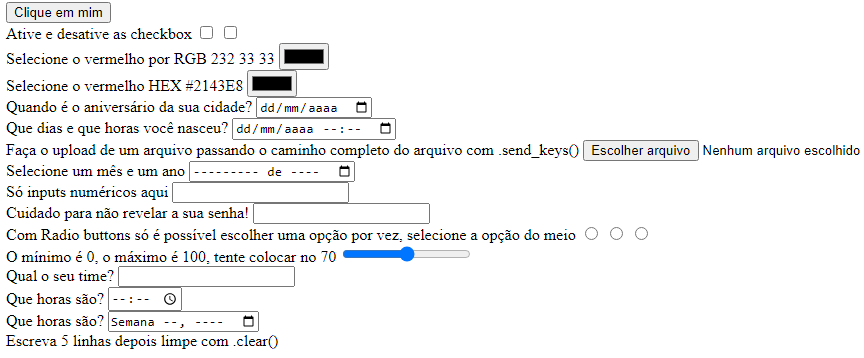
<br>

In [3]:
# Importando módulos
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

# Inicia webdrivermanager
servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)


In [9]:
# Outro módulo para gerenciamento de pasta
import os

# Define caminho
caminho = os.getcwd()

# Define local do arquivo html
arquivo = caminho + r'\formulario.html'

# Abre no navegador
navegador.get(arquivo)


# Manipulando elementos de formulários

## Clicando no botão

O botão é muito simples, basta usar a técnica usada anteriormente, lembre-se de inspecionar a página e verificar se há algum id, classe ou se não use o xpath. Nesse caso a páginá abrirá um pop-up, mas veremos como interagir com ele também.

### Interagindo com pop-up

Caso seu driver seja de nome navegador:\

```
alerta = navegador.switch_to.alert
alerta.accept() # Para aceitar
alerta.dismiss() # Para cancelar
```

In [14]:
# Clicando no botão
navegador.find_element(By.XPATH, '/html/body/form/input[1]').click()

# Interagindo com o pop-up
alerta = navegador.switch_to.alert
alerta.accept()


## Seleção de elementos no etilo checkbox

Para selecionar um
- [ ] checkbox
E outros elementos parecidos, usamos alguns métodos, são eles:
* ```.text```
* ```.get_attribute(`value`) # Verifica o valor```
* ```.is_selected # Verifica se o elemento ou checkbox esta ou nao selecionado```


In [17]:
# Clicando em checkbox
navegador.find_element(By.XPATH, '/html/body/form/input[2]').click()
navegador.find_element(By.XPATH, '/html/body/form/input[3]').click()


In [23]:
valor = navegador.find_element(By.XPATH, '/html/body/form/input[3]').get_attribute('value')

print(valor)


on
